In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string, sys, itertools
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

reload(sys)
sys.setdefaultencoding('latin-1')

#imports

In [2]:

# read csv into dataframe
tweet_df = pd.read_csv('gender-classifier-DFE-791531.csv')

In [3]:
tweet_df.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


In [4]:
tweet_df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [5]:
tweet_df.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

In [6]:
tweet_df.shape

(20050, 26)

In [7]:
# I only want to work with data that is 100% certain on its gender classification
confident_genders = tweet_df[tweet_df['gender:confidence'] == 1]

# I'm also ignoring tweets with 'unknown' genders
final_tweets = confident_genders[confident_genders['gender'] != 'unknown']
final_tweets.shape

(13804, 26)

In [29]:
final_tweets['gender'].value_counts()

female    5367
male      4653
brand     3784
Name: gender, dtype: int64

In [8]:
print final_tweets['text'].head(10)
print final_tweets['description'].head(10)

In [9]:
# Normalize text in tweets and descriptions.
# Remove punctuation, go lowercase


final_tweets['text_norm'] = [str(s).translate(None, string.punctuation).lower() for s in final_tweets['text']]
final_tweets['description_norm'] = [str(s).translate(None, string.punctuation).lower() for s in final_tweets['description']]

print final_tweets['text_norm'].head(10)
print final_tweets['description_norm'].head(10)

# create a row for combined description and tweet

final_tweets['text_description'] = final_tweets['text_norm'].str.cat(final_tweets['description_norm'], sep=' ')
print final_tweets['text_description'].head(10)

Now I want to try 3 different Naive Bayes classifiers.
One using just the tweets,
One using just the descriptions,
And one using the combination of tweets and descriptions

In [10]:
# Just tweets

#Create train/test split
X = final_tweets.text_norm
y = final_tweets.gender
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Vectorize X_train and X_test
# stop_words='english'
vect = CountVectorizer(decode_error='ignore')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
tweet_accuracy = metrics.accuracy_score(y_test, y_pred_class)
tweet_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

tweet_accuracy

0.568241089539264

In [11]:
# Just descriptions

#Create train/test split
X = final_tweets.description_norm
y = final_tweets.gender
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Vectorize X_train and X_test
# stop_words='english'
vect = CountVectorizer(decode_error='ignore')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
desc_accuracy = metrics.accuracy_score(y_test, y_pred_class)
desc_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)


desc_accuracy

0.61924079976818314

In [12]:
# Tweet/description combination

#Create train/test split
X = final_tweets.text_description
y = final_tweets.gender
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Vectorize X_train and X_test
# stop_words='english'
vect = CountVectorizer(decode_error='ignore')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
combo_accuracy = metrics.accuracy_score(y_test, y_pred_class)
combo_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

combo_accuracy

0.6745870762097943

In [19]:
class_names = ['male', 'female', 'brand']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

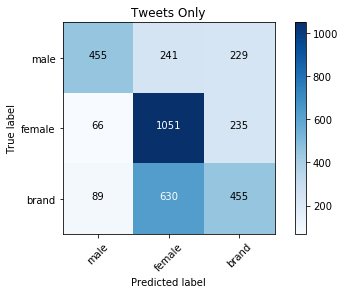

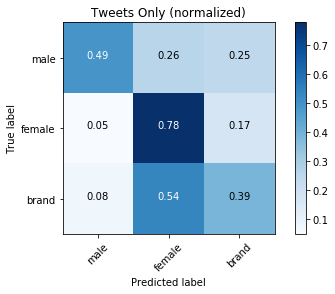

In [26]:
plt.figure()
plot_confusion_matrix(tweet_confusion_matrix, classes=class_names,
                      title='Tweets Only')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(tweet_confusion_matrix, classes=class_names, normalize=True,
                      title='Tweets Only (normalized)')

plt.show()

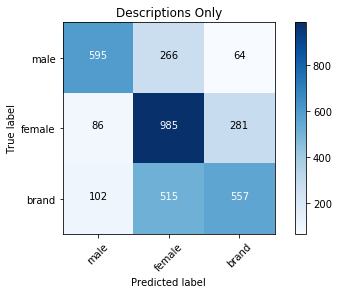

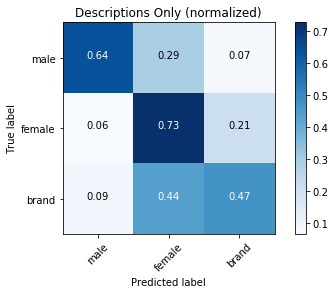

In [27]:
plt.figure()
plot_confusion_matrix(desc_confusion_matrix, classes=class_names,
                      title='Descriptions Only')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(desc_confusion_matrix, classes=class_names, normalize=True,
                      title='Descriptions Only (normalized)')

plt.show()

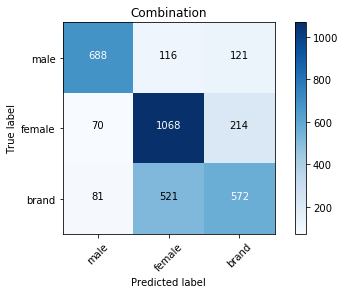

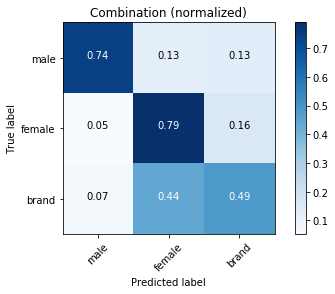

In [28]:
plt.figure()
plot_confusion_matrix(combo_confusion_matrix, classes=class_names,
                      title='Combination')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(combo_confusion_matrix, classes=class_names, normalize=True,
                      title='Combination (normalized)')

plt.show()